In [1]:
import mysql.connector
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Creating connection object
conn = mysql.connector.connect(
    host = "127.0.0.1",
    user = "root",
    password = "dh641997",
    database = "test_data_analyst"
)

cursor = conn.cursor()
databases = (" SELECT customer_id, customer_name, segment, avg(quantity) as mean_quantity, avg(discount) as mean_discount FROM orders group by customer_id")
cursor.execute(databases)
        
# fetch all the matching rows 
result = cursor.fetchall()
  
cursor.close()
conn.close()

In [2]:
df = pd.DataFrame(result, columns=[column[0] for column in cursor.description])

In [3]:
print (df)

    customer_id      customer_name      segment mean_quantity mean_discount
0      CG-12520        Claire Gute     Consumer        2.8000      0.200000
1      DV-13045    Darrin Van Huff    Corporate        3.1111      0.172222
2      SO-20335     Sean O'Donnell     Consumer        3.4667      0.136667
3      BH-11710    Brosina Hoffman     Consumer        4.0417      0.183333
4      AA-10480       Andrew Allen     Consumer        3.0000      0.016667
..          ...                ...          ...           ...           ...
788    CJ-11875       Carl Jackson    Corporate        5.0000      0.200000
789    RS-19870         Roy Skaria  Home Office        3.3333      0.066667
790    SC-20845         Sung Chung     Consumer        3.2500      0.200000
791    RE-19405    Ricardo Emerson     Consumer        5.0000      0.200000
792    SM-20905  Susan MacKendrick     Consumer        3.3333      0.283333

[793 rows x 5 columns]


In [4]:
df.describe()

,customer_id,customer_name,segment,mean_quantity,mean_discount
count,793,793,793,793,793
unique,793,793,3,287,340
top,CG-12520,Claire Gute,Consumer,4.0000,0.200000
freq,1,1,409,43,30


In [5]:
X = df.iloc[:,[3,4]].values


In [6]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


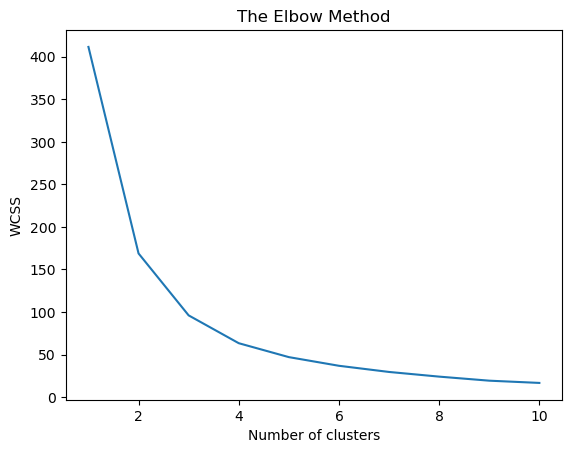

In [7]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
# Applying KMeans to the dataset with the optimal number of cluster
kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

In [11]:
print(kmeans)

KMeans(n_clusters=3, random_state=0)


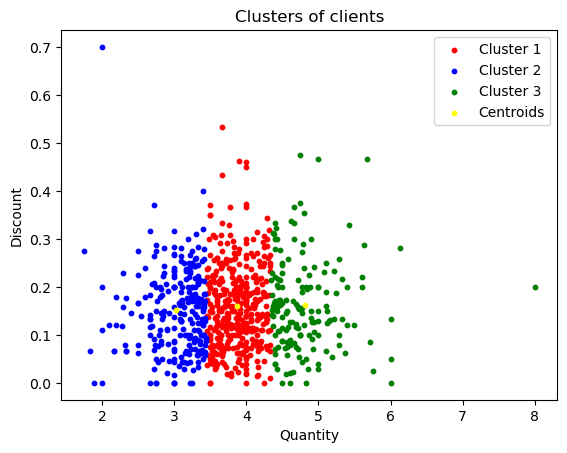

In [10]:
# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 10, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 10, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 10, c='green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 10, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Quantity')
plt.ylabel('Discount')
plt.legend()
plt.show()

In [12]:
# Assume a new customer with the following features
new_customer = [5, 0.25]

# Reshape the feature array
new_customer = np.array(new_customer).reshape(1,-1)

# Predict the cluster label for the new customer
cluster_label = kmeans.predict(new_customer)

print("The new customer belongs to cluster", cluster_label)

NameError: name 'np' is not defined